LR models the relationship between a dependent variable $y$ and one or more independent variables $x_1,x_2,…,x_k$

In Matrix form: $$Y = X\beta + u$$

Ordinary Least Square (OLS) minimizes the sum of square residuals:
$$
\min_{\beta} S(\beta) = (Y - X\beta)'(Y - X\beta) = Y'Y-2\beta'X'Y+\beta'X'X\beta, \,\ because \,\ Y'X\beta=YX'\beta'
$$
$$
\frac{\partial S(\beta)}{\partial \beta} = -2X'Y + 2X'X\beta  \overset{!}{=} 0
$$
$$\Leftrightarrow X'Y = X'X\beta \Leftrightarrow \hat{\beta} =(X'X)^{-1}X'Y$$

We can show that with the Assumption:
$$
E(u \mid X) = 0,
$$
$$ \Rightarrow E(Y \mid X)=\beta X $$
that the OLS-Estimator is unbiased:
$$
E(\hat{\beta} \mid X) = (X'X)^{-1}X'E(Y \mid X) = (X'X)^{-1}X'(X\beta) = \beta.
$$
To be unbiased the OLS-Estimator needs the MLR.1-MLR.4, and to be BLUE MLR.1-MLR.5 of the Gauss-Markov assumptions. For effective Inference MLR.6 should hold true:

This can also be achieved when plugging $Y=X\beta + u$ into $\hat{\beta}$:
$$\Leftrightarrow \hat{\beta} =(X'X)^{-1}X'(X\beta+u)$$
$$\Leftrightarrow \hat{\beta} =(X'X)^{-1}(X'X\beta+X'u)$$
$$\Leftrightarrow \hat{\beta} =\beta + (X'X)^{-1}X'u,\,\ because (X'X)^{−1}(X'X)=I$$
$$\beta =\hat{\beta}-(X'X)^{-1}X'u $$
$$\beta =(X'X)^{-1}X'Y-(X'X)^{-1}X'u $$
As $E(u \mid X) = 0$ this cancels out to: $$\beta =(X'X)^{-1}X'Y$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# 1) Load the data
Path_life_expectancy = r'C:\Users\jonaw\OneDrive\Dokumente\Coding\Computational Economics\Econometrics\Data\life_expectancy.csv'

pd.read_csv(Path_life_expectancy)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [2]:
# List all columns in the dataset
df = pd.read_csv(Path_life_expectancy)
print(df.columns)

# Rename columns for easier access
df = df.rename(columns={'Life expectancy ': 'Life_expectancy'})

# Drop NA values for Life Expectancy and Schooling
df = df.dropna(subset=['Life_expectancy', 'Schooling'])

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


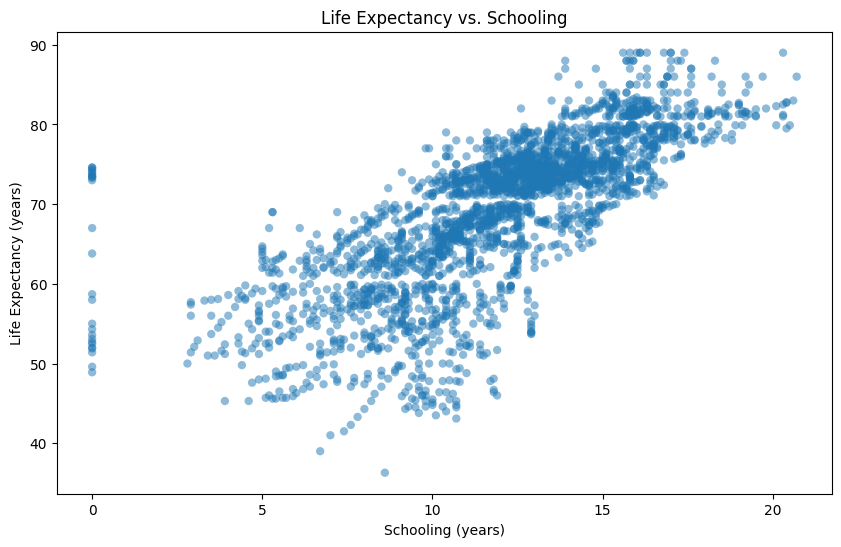

In [3]:
# 2) Create a scatter plot of Life Expectancy vs. Schooling
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Schooling', y='Life_expectancy', alpha=0.5, edgecolor='none')
plt.title('Life Expectancy vs. Schooling')
plt.xlabel('Schooling (years)')
plt.ylabel('Life Expectancy (years)')
plt.show()


In [4]:
# 3) Estimate the simple linear regression model
import statsmodels.formula.api as smf

model = smf.ols(formula='Life_expectancy ~ Schooling', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     3599.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        08:40:51   Log-Likelihood:                -8964.3
No. Observations:                2768   AIC:                         1.793e+04
Df Residuals:                    2766   BIC:                         1.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.1089      0.437    100.992      0.0

5, 6) We can see that $\hat{\beta_1} = 2.1035 $, which implies a ceteris paribus increase in Life Expectance by ca. 2.1 Years for one Year of Schooling. $\hat{\beta_1}$ is therefore the slope coefficient of the regression line.

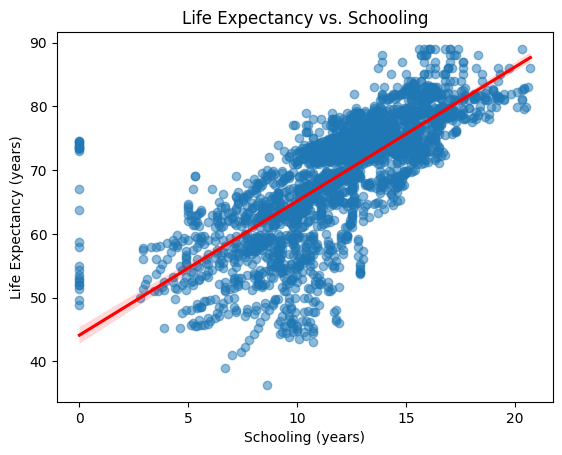

In [5]:

sns.regplot(
    x='Schooling', 
    y='Life_expectancy', 
    data=df, 
    ci=95,
    scatter_kws={'alpha': 0.5},    # Setzt die Transparenz der Punkte
    line_kws={'color': 'red'}      # Setzt die Farbe der Regressionslinie auf rot
)
plt.title('Life Expectancy vs. Schooling')
plt.xlabel('Schooling (years)')
plt.ylabel('Life Expectancy (years)')
plt.show()


In [6]:
# 7) Sort the observations by country name and keep only the first 5 observations.
df_sorted = df.sort_values(by='Country').head(5)
print(df_sorted)


        Country  Year      Status  Life_expectancy  Adult Mortality  \
0   Afghanistan  2015  Developing             65.0            263.0   
15  Afghanistan  2000  Developing             54.8            321.0   
14  Afghanistan  2001  Developing             55.3            316.0   
13  Afghanistan  2002  Developing             56.2              3.0   
12  Afghanistan  2003  Developing             56.7            295.0   

    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0              62     0.01               71.279624         65.0      1154   
15             88     0.01               10.424960         62.0      6532   
14             88     0.01               10.574728         63.0      8762   
13             88     0.01               16.887351         64.0      2486   
12             87     0.01               11.089053         65.0       798   

    ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0   ...    6.0               8.16    

In [7]:
# Divide the GDP variable by 1000 to re-scale it
df['GDP_rescaled'] = df['GDP'] / 1000

# Estimte new Model including the rescaled GDP 
model_2 = smf.ols(formula='Life_expectancy ~ Schooling + GDP_rescaled', data=df).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     1776.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        08:40:51   Log-Likelihood:                -8041.5
No. Observations:                2482   AIC:                         1.609e+04
Df Residuals:                    2479   BIC:                         1.611e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       44.9762      0.484     92.881   

We can see that the Coefficient for Schooling is slightly lower. One explaniation might be the Omitted Variable Bias (OVB). In Model 1, where GDP is not included, the effect of schooling might be upward biased because GDP has an influence on Life Expectancy and also positively correlates with Schooling. If GDP is included, the effect from GDP on Life Expectancy, is only measured in GDP, which deflates the Coefficient for Schooling.

In [8]:
# Correlation matrix of the variables
r = df['Schooling'].corr(df['GDP_rescaled'])
print("r:", r)

r: 0.44991956744233513
